<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Trend-and-seasonality" data-toc-modified-id="Trend-and-seasonality-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Trend and seasonality</a></span></li><li><span><a href="#Добавление-признаков" data-toc-modified-id="Добавление-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Добавление признаков</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Определение-необходимого-числа-признаков-с-помощью-Linear-regression" data-toc-modified-id="Определение-необходимого-числа-признаков-с-помощью-Linear-regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Определение необходимого числа признаков с помощью Linear regression</a></span></li><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Linear regression</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#Gradient-Boosting-(LightGBM)" data-toc-modified-id="Gradient-Boosting-(LightGBM)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Gradient Boosting (LightGBM)</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Trend-and-seasonality" data-toc-modified-id="Trend-and-seasonality-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Trend and seasonality</a></span></li><li><span><a href="#Добавление-признаков" data-toc-modified-id="Добавление-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Добавление признаков</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Определение-необходимого-числа-признаков-с-помощью-Linear-regression" data-toc-modified-id="Определение-необходимого-числа-признаков-с-помощью-Linear-regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Определение необходимого числа признаков с помощью Linear regression</a></span></li><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Linear regression</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#Gradient-Boosting-(LightGBM)" data-toc-modified-id="Gradient-Boosting-(LightGBM)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Gradient Boosting (LightGBM)</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Подготовка

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import time
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform, randint

from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
import lightgbm as lgb

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv('datasets/taxi.csv', index_col=[0], parse_dates=[0]) 
display(df.head())
df.info()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
df.sort_index(inplace=True)
df = df.resample('1H').sum()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215FEFC8640>]],
      dtype=object)

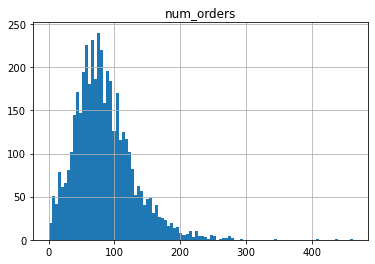

In [5]:
df.hist(bins=100)

## Анализ

In [6]:
data = df.copy()

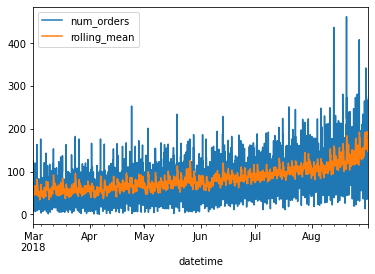

In [7]:
data['rolling_mean'] = data.rolling(15).mean()
data.plot()
plt.show()

### Trend and seasonality

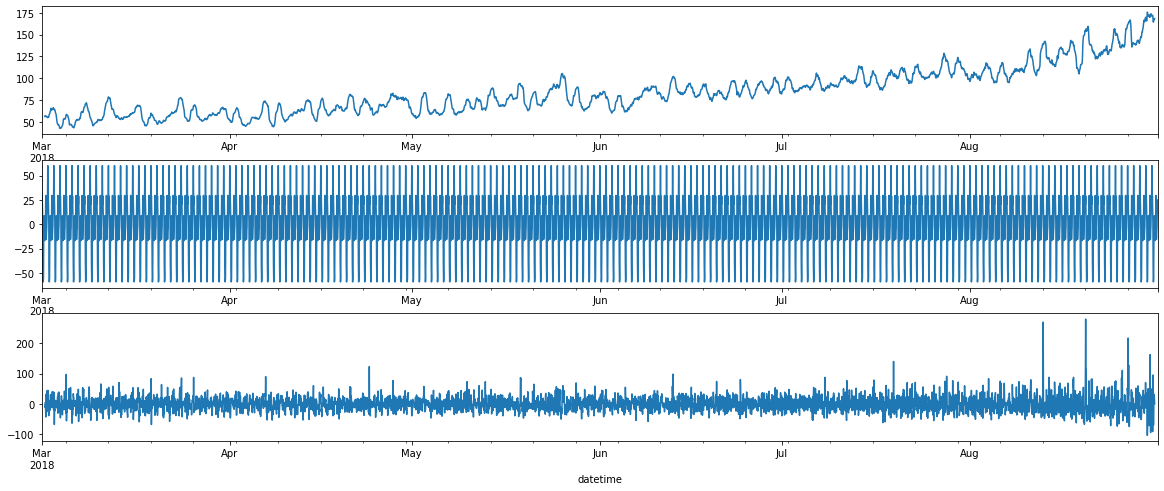

In [8]:
decomposed = seasonal_decompose(df)
plt.figure(figsize=(20,8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.show()

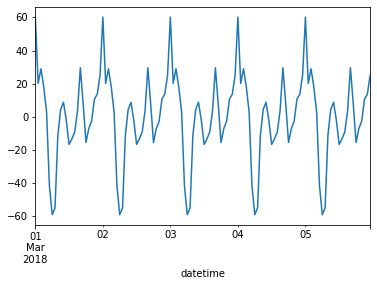

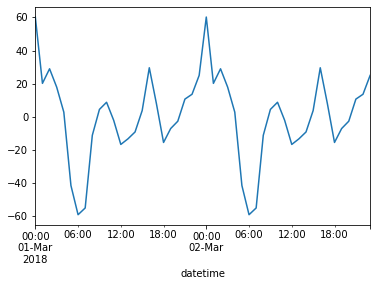

In [9]:
decomposed.seasonal['2018-03-01':'2018-03-05'].plot()
plt.show()
decomposed.seasonal['2018-03-01':'2018-03-02'].plot()
plt.show()

Наблюдается цикличность по дням. Наибольшая активность обычно в 00 ч и в 06 ч.

### Добавление признаков
Добавим Календарные признаки, «Отстающие значения» и Скользящее среднее


In [10]:
def make_features(data, max_lag, rolling_mean_size):
    df = data.copy()
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = df['num_orders'].rolling(rolling_mean_size, closed='left').mean()
    df= df.dropna()
    return df

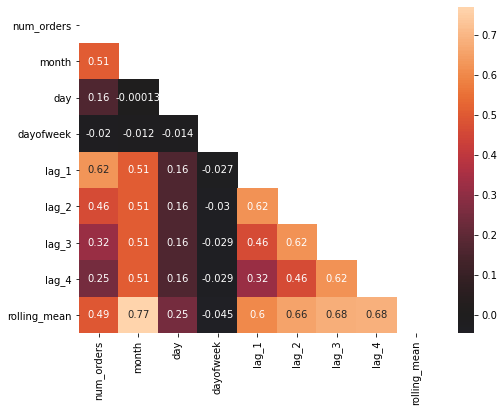

In [11]:
df_with_features = make_features(df, 4, 10)
df_with_features.head()

plt.figure(figsize=(8, 6))
corr = df_with_features.corr()
matrix = np.triu(corr)
sns.heatmap(corr, center=0, annot=True, mask=matrix)

Количество заказов в конкретный час хорошо кореллирует с месяцем поездки, количеством поездок за последние два часа и скользящим средним.

## Обучение
### Определение необходимого числа признаков с помощью Linear regression

In [22]:
lags = range(1,7)
rolling_sizes = range(1,25)
rmse=[]
rmse2=[]

for lag in lags:
    for rolling_size in rolling_sizes:
        data_new = make_features(data, lag, rolling_size)

        X_train,X_test, y_train, y_test = train_test_split(data_new.drop(['num_orders'], axis=1),
                                                             data_new['num_orders'], shuffle=False, test_size=0.2)
        model = LinearRegression()
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        rmse.append(mean_squared_error(train_pred, y_train)**0.5)

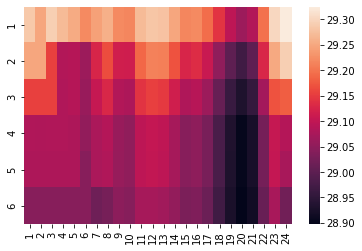

In [23]:
rmse_results = pd.DataFrame(data=np.array(rmse).reshape(len(lags), len(rolling_sizes)), columns=rolling_sizes, index=lags)
sns.heatmap(rmse_results)
plt.show()

Будем использовать отстающие значения за предыдущие 3 часа и скользящее среднее за предыдущие 24 часа.

In [24]:
df_with_features = make_features(df, max_lag=3, rolling_mean_size=24)
display(df_with_features.head())

,num_orders,month,day,dayofweek,lag_1,lag_2,lag_3,rolling_mean
datetime,,,,,,,,
2018-03-02 00:00:00,90,3,2,4,58.0,113.0,66.0,56.833333
2018-03-02 01:00:00,120,3,2,4,90.0,58.0,113.0,55.416667
2018-03-02 02:00:00,75,3,2,4,120.0,90.0,58.0,56.875000
2018-03-02 03:00:00,64,3,2,4,75.0,120.0,90.0,57.041667
2018-03-02 04:00:00,20,3,2,4,64.0,75.0,120.0,56.958333


In [25]:
#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(df_with_features.drop(['num_orders'], axis=1),
                                                    df_with_features['num_orders'], shuffle=False, test_size=0.1)

### Linear regression

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
print('RMSE:',round(mean_squared_error(train_pred, y_train)**0.5, 2))

RMSE: 30.63


In [74]:
model = LinearRegression()
model.fit(X_train, y_train)
train_pred = model.predict(X_test)
print('RMSE:',round(mean_squared_error(train_pred, y_test)**0.5, 2))

RMSE: 51.35


### RandomForest

In [19]:
%%time
model = RandomForestRegressor(random_state=25)

params = dict(n_estimators=range(10,101,30), max_depth=range(1, 16))
gridsearch = GridSearchCV(model, params, scoring='neg_root_mean_squared_error', cv=2, n_jobs=7)
search = gridsearch.fit(X_train, y_train)

print('best parameters:',search.best_params_)
print('best RMSE:', -search.best_score_)

best parameters: {'max_depth': 10, 'n_estimators': 100}
best RMSE: 30.947274426024304
Wall time: 9.72 s


### Gradient Boosting (LightGBM)

In [20]:
%%time
callbacks = [lgb.log_evaluation(period=0)]
model = lgb.LGBMRegressor(random_state=25, objective='rmse')

params = dict(n_estimators=range(100,1001,100), max_depth=range(1, 16), learning_rate=[0.01, 0.02, 0.05, 0.1])
gridsearch = GridSearchCV(model, params, scoring='neg_root_mean_squared_error', cv=5, n_jobs=7)
# search = gridsearch.fit(X_train, y_train, eval_set=(X_valid, y_valid), callbacks= callbacks)
search = gridsearch.fit(X_train, y_train, callbacks= callbacks)

print('best parameters:',search.best_params_)
print('best RMSE:', -search.best_score_)

best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 600}
best RMSE: 27.718294456033995
Wall time: 3min 9s


### CatBoost

In [89]:
%%time
model = CatBoostRegressor(random_state=25, verbose=200)

params = dict(n_estimators=range(100,1001,100), max_depth=range(1, 16, 3), learning_rate=[0.01, 0.02, 0.05, 0.1]) #
gridsearch = GridSearchCV(model, params, scoring='neg_root_mean_squared_error', cv=5, n_jobs=7)
search = gridsearch.fit(X_train, y_train)

print('best parameters:',search.best_params_)
print('best RMSE:', -search.best_score_)

0:	learn: 37.4006899	total: 2.87ms	remaining: 284ms
99:	learn: 26.6732599	total: 195ms	remaining: 0us
best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
best RMSE: 30.18384956880672
Wall time: 1h 30min 56s


### Вывод
Градиентный бустинг (LightGBM) показывает лучшее качество на тренировочных данных (RMSE=30.2). Будем использовать его для тестирования со следующими параметрами:

`{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 600}`

## Тестирование

In [33]:
callbacks = [lgb.log_evaluation(period=1)]
model = lgb.LGBMRegressor(random_state=25, objective='rmse', **{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000})
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('RMSE:',round(mean_squared_error(y_pred, y_test)**0.5, 2))

RMSE: 52.9


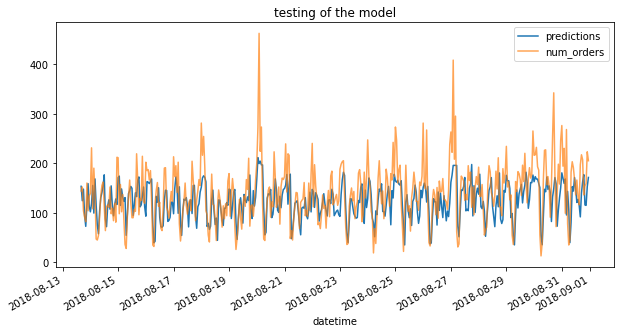

In [73]:
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_pred, label='predictions', alpha=1)
y_test.plot( alpha=0.7)
plt.title('testing of the model')
plt.xtitle('Number of orders')
plt.legend()
plt.show()

### Вывод
Градиентный бустинг с подобранными параметрами на тестовой выборке показывает RMSE = 52.9.

## Общий вывод
Проанализировали датасет с количеством заказов такси за полгода. Провели ресэмплинг данных с интервалом 1ч. К временному ряду добавили 3 "остающих признака" и скользящее среднее, рассчитанное по последним 24 часам. На тренировочной выборке обучили модели линейной регресии, случайного леса, градиентного бустинга (lightgbm и Catboost) с подбором гиперпараметров. Лучшее качество на тренировочных данных показала модель LightGBM с гиперпараметрами `{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 600}` и RMSE=30.2. На тестовых данных данная модель показала значение метрики качества RMSE, равное 52.9. 

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- []  Значение *RMSE* на тестовой выборке не больше 48